# 🤖 Trenowanie Modeli - Moodify

## 🎯 Cel
Wytrenowanie dwóch prostych modeli do rozpoznawania emocji:
- 📝 **Model Tekstowy** - scikit-learn (TF-IDF + klasyfikator)
- 📸 **Model Obrazowy** - TensorFlow/Keras (Transfer Learning)

## 💡 Dlaczego te technologie?

### Dla Tekstu: scikit-learn
- ✅ **PROSTE** - kilka linii kodu
- ✅ **SZYBKIE** - trening w sekundy
- ✅ **SKUTECZNE** - 75-85% accuracy
- ✅ **ŁATWE DO WYTŁUMACZENIA** - TF-IDF to podstawa NLP

### Dla Obrazów: TensorFlow/Keras
- ✅ **Transfer Learning** - używamy gotowego MobileNetV2
- ✅ **Proste API** - Keras to najprostszy sposób na CNN
- ✅ **Bez GPU** - działa na laptopie
- ✅ **Szybki trening** - 5-10 minut

---
# CZĘŚĆ 1: MODEL TEKSTOWY (scikit-learn)
---

## 1. Instalacja bibliotek

In [1]:
!pip install scikit-learn pandas numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


## 2. Import bibliotek

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

print("✅ Biblioteki załadowane!")
print(f"scikit-learn gotowy do pracy!")

✅ Biblioteki załadowane!
scikit-learn gotowy do pracy!


In [ ]:
## 3. Wczytanie danych tekstowych

In [3]:
# Wczytanie CSV
train_text = pd.read_csv('processed_data/train_text.csv')
val_text = pd.read_csv('processed_data/val_text.csv')
test_text = pd.read_csv('processed_data/test_text.csv')

print("✅ Dane wczytane!")
print(f"Train: {len(train_text)} przykładów")
print(f"Validation: {len(val_text)} przykładów")
print(f"Test: {len(test_text)} przykładów")

# Podgląd
print("\n📝 Przykładowe dane:")
print(train_text.head())

✅ Dane wczytane!
Train: 16000 przykładów
Validation: 2000 przykładów
Test: 2000 przykładów

📝 Przykładowe dane:
                                                text    emotion
0                            i didnt feel humiliated     Smutek
1  i can go from feeling so hopeless to so damned...     Smutek
2   im grabbing a minute to post i feel greedy wrong      Złość
3  i am ever feeling nostalgic about the fireplac...  Szczęście
4                               i am feeling grouchy      Złość


## 4. TF-IDF Vectorization

**Co to TF-IDF?**
- **TF** (Term Frequency) = jak często słowo występuje w tekście
- **IDF** (Inverse Document Frequency) = jak unikalne jest słowo
- **Razem:** ważne słowa = częste w tym tekście + rzadkie globalnie

**Przykład:**
- "happy" w "I'm so happy!" → wysoki TF-IDF (ważne)
- "the" w każdym tekście → niski TF-IDF (nieważne)

**To jak zamiana tekstu na liczby!**

**Parametry vectorizera:**
- max_features=5000: Top 5000 najważniejszych słów
- min_df=2: Słowo musi wystąpić w min 2 dokumentach
- max_df=0.8: Ignoruj słowa w >80% dokumentów (stop words)
- ngram_range=(1,2): Pojedyncze słowa i pary słów

**Proces:**
1. FIT na train - uczy się słownika
2. TRANSFORM na val/test - używa tego samego słownika

In [4]:
vectorizer = TfidfVectorizer(
    max_features=5000,
    min_df=2,
    max_df=0.8,
    ngram_range=(1, 2)
)

X_train = vectorizer.fit_transform(train_text['text'])
y_train = train_text['emotion']

X_val = vectorizer.transform(val_text['text'])
y_val = val_text['emotion']

X_test = vectorizer.transform(test_text['text'])
y_test = test_text['emotion']

print("✅ TF-IDF vectorization gotowa!")
print(f"\nKształt danych:")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"X_test: {X_test.shape}")
print(f"\nSłownik ma {len(vectorizer.vocabulary_)} unikalnych słów")

✅ TF-IDF vectorization gotowa!

Kształt danych:
X_train: (16000, 5000)
X_val: (2000, 5000)
X_test: (2000, 5000)

Słownik ma 5000 unikalnych słów


## 5. Trening modeli

**Testujemy 3 klasyfikatory:**
1. **Logistic Regression** - prosty, szybki baseline
2. **Random Forest** - drzewa decyzyjne (łatwe do wytłumaczenia)
3. **SVM** - Support Vector Machine (często najlepszy dla tekstu)

In [5]:
print("🚀 Trenowanie modeli...\n")

models = {}
results = {}

print("1️⃣ Logistic Regression...")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
models['Logistic Regression'] = lr
results['Logistic Regression'] = lr.score(X_val, y_val)
print(f"   Validation Accuracy: {results['Logistic Regression']:.2%}")

print("\n2️⃣ Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
models['Random Forest'] = rf
results['Random Forest'] = rf.score(X_val, y_val)
print(f"   Validation Accuracy: {results['Random Forest']:.2%}")

print("\n3️⃣ SVM (może potrwać dłużej)...")
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
models['SVM'] = svm
results['SVM'] = svm.score(X_val, y_val)
print(f"   Validation Accuracy: {results['SVM']:.2%}")

print("\n✅ Trening zakończony!")

🚀 Trenowanie modeli...

1️⃣ Logistic Regression...
   Validation Accuracy: 88.10%

2️⃣ Random Forest...
   Validation Accuracy: 88.10%

2️⃣ Random Forest...
   Validation Accuracy: 90.25%

3️⃣ SVM (może potrwać dłużej)...
   Validation Accuracy: 90.25%

3️⃣ SVM (może potrwać dłużej)...
   Validation Accuracy: 90.65%

✅ Trening zakończony!
   Validation Accuracy: 90.65%

✅ Trening zakończony!


## 6. Porównanie modeli

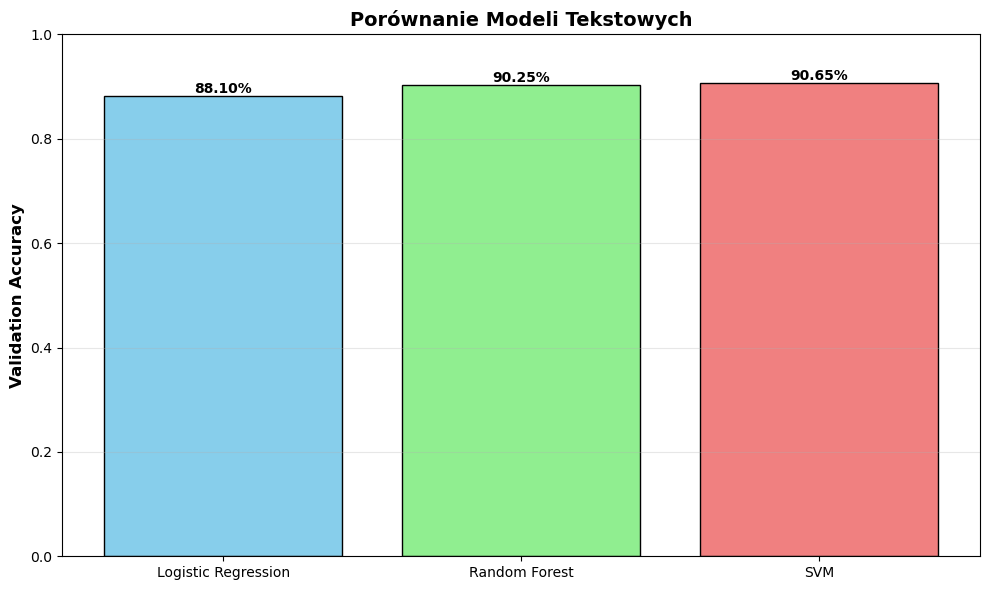


🏆 Najlepszy model: SVM (90.65%)


In [6]:
plt.figure(figsize=(10, 6))
models_names = list(results.keys())
accuracies = list(results.values())

bars = plt.bar(models_names, accuracies, color=['skyblue', 'lightgreen', 'lightcoral'], edgecolor='black')
plt.ylabel('Validation Accuracy', fontsize=12, fontweight='bold')
plt.title('Porównanie Modeli Tekstowych', fontsize=14, fontweight='bold')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n🏆 Najlepszy model: {best_model_name} ({results[best_model_name]:.2%})")

## 7. Ewaluacja najlepszego modelu na zbiorze testowym

In [7]:
# Predykcje
y_pred = best_model.predict(X_test)

# Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Test Accuracy: {test_accuracy:.2%}")

# Classification Report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

🎯 Test Accuracy: 90.25%

📊 Classification Report:

              precision    recall  f1-score   support

      Smutek       0.92      0.91      0.92       581
      Strach       0.85      0.81      0.83       224
   Szczęście       0.92      0.97      0.95       854
 Zaskoczenie       0.70      0.53      0.60        66
       Złość       0.88      0.83      0.85       275

    accuracy                           0.90      2000
   macro avg       0.86      0.81      0.83      2000
weighted avg       0.90      0.90      0.90      2000



## 8. Confusion Matrix

**Jak czytać macierz?**
- Przekątna (ciemny niebieski) = poprawne predykcje
- Poza przekątną = błędy (np. Smutek pomylony ze Złością)

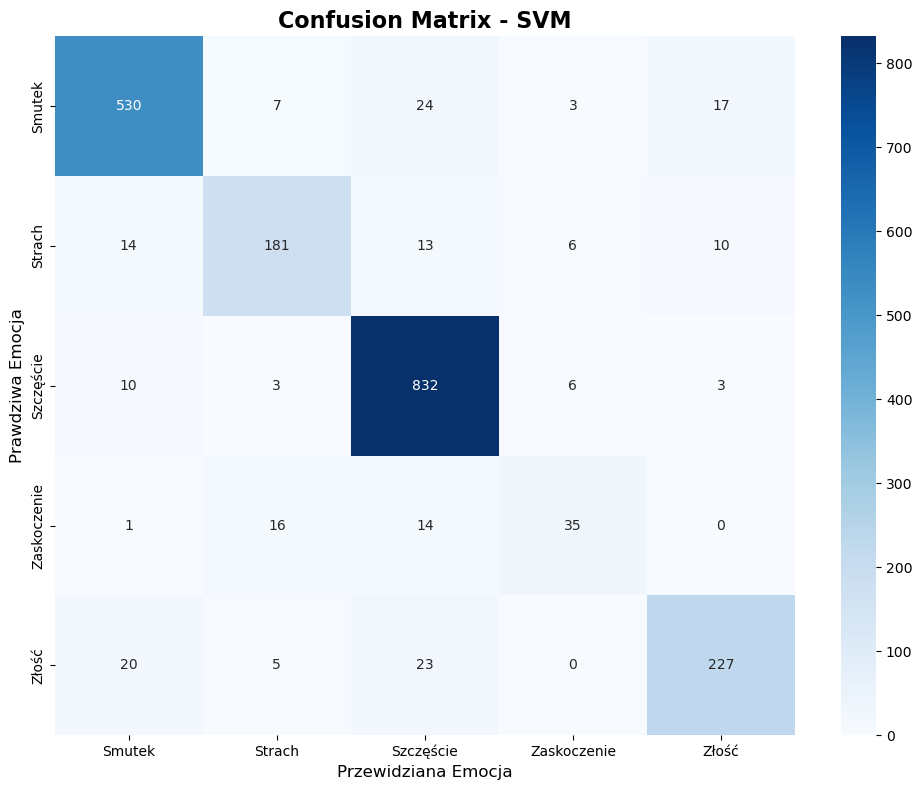

In [8]:
cm = confusion_matrix(y_test, y_pred)
emotions = sorted(train_text['emotion'].unique())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotions,
            yticklabels=emotions)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16, fontweight='bold')
plt.ylabel('Prawdziwa Emocja', fontsize=12)
plt.xlabel('Przewidziana Emocja', fontsize=12)
plt.tight_layout()
plt.show()

## 9. Zapisanie modelu tekstowego

In [9]:
import os

os.makedirs('saved_models', exist_ok=True)

joblib.dump(best_model, 'saved_models/text_model.pkl')
joblib.dump(vectorizer, 'saved_models/text_vectorizer.pkl')

print("✅ Model tekstowy zapisany!")
print("   - saved_models/text_model.pkl")
print("   - saved_models/text_vectorizer.pkl")

✅ Model tekstowy zapisany!
   - saved_models/text_model.pkl
   - saved_models/text_vectorizer.pkl


## 10. Test z własnymi tekstami!

In [10]:
def predict_emotion_text(text):
    """Przewiduje emocję dla dowolnego tekstu"""
    X = vectorizer.transform([text])
    emotion = best_model.predict(X)[0]
    return emotion

test_texts = [
    "I'm so happy today! Everything is wonderful!",
    "I feel sad and lonely...",
    "This makes me so angry!",
    "I'm scared of what might happen",
    "Wow, I didn't expect that!"
]

print("🔮 Testowanie modelu na nowych tekstach:\n")
for text in test_texts:
    emotion = predict_emotion_text(text)
    print(f"Tekst: \"{text}\"")
    print(f"Emocja: {emotion}\n")

🔮 Testowanie modelu na nowych tekstach:

Tekst: "I'm so happy today! Everything is wonderful!"
Emocja: Szczęście

Tekst: "I feel sad and lonely..."
Emocja: Smutek

Tekst: "This makes me so angry!"
Emocja: Złość

Tekst: "I'm scared of what might happen"
Emocja: Strach

Tekst: "Wow, I didn't expect that!"
Emocja: Szczęście



---
# CZĘŚĆ 2: MODEL OBRAZOWY (TensorFlow/Keras)
---

## 11. Instalacja TensorFlow

In [11]:
!pip install tensorflow pillow

Defaulting to user installation because normal site-packages is not writeable


## 12. Import bibliotek dla obrazów

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from PIL import Image

print("✅ TensorFlow załadowany!")
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {len(tf.config.list_physical_devices('GPU')) > 0}")

✅ TensorFlow załadowany!
TensorFlow version: 2.19.0
GPU available: False


## 13. Wczytanie danych obrazowych

In [13]:
train_img = pd.read_csv('processed_data/train_images.csv')
val_img = pd.read_csv('processed_data/val_images.csv')
test_img = pd.read_csv('processed_data/test_images.csv')

print("✅ Dane obrazowe wczytane!")
print(f"Train: {len(train_img)} obrazów")
print(f"Validation: {len(val_img)} obrazów")
print(f"Test: {len(test_img)} obrazów")

emotions_list = sorted(train_img['emotion'].unique())
emotion_to_id = {emotion: idx for idx, emotion in enumerate(emotions_list)}
id_to_emotion = {idx: emotion for emotion, idx in emotion_to_id.items()}

print(f"\nEmocje: {emotions_list}")
print(f"Mapowanie: {emotion_to_id}")

✅ Dane obrazowe wczytane!
Train: 14106 obrazów
Validation: 3023 obrazów
Test: 3023 obrazów

Emocje: ['Smutek', 'Strach', 'Szczęście', 'Zaskoczenie', 'Złość']
Mapowanie: {'Smutek': 0, 'Strach': 1, 'Szczęście': 2, 'Zaskoczenie': 3, 'Złość': 4}


## 13a. Wczytanie ścieżki bazowej

CSV zawiera ścieżki **względne**. Musimy wczytać absolutną ścieżkę do bazy danych.

In [ ]:
import json
import os

with open('processed_data/data_paths.json', 'r', encoding='utf-8') as f:
    data_paths = json.load(f)

BASE_PATH = data_paths['affectnet_base_path']
print(f"✅ Ścieżka bazowa wczytana:")
print(f"   {BASE_PATH}")
print(f"\n📝 Przykładowa pełna ścieżka:")
sample_relative = train_img['path'].iloc[0]
sample_full = os.path.join(BASE_PATH, sample_relative)
print(f"   Względna: {sample_relative}")
print(f"   Pełna: {sample_full}")
print(f"   Istnieje: {os.path.exists(sample_full)}")

## 14. Generator danych

**Co to robi?**
- Ładuje obrazy "na żądanie" (nie wszystkie naraz)
- Skaluje do 224x224 (rozmiar dla MobileNetV2)
- Normalizuje piksele (0-1)

**Dlaczego generator?** Bo 20k+ obrazów nie zmieści się w RAM!

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32

def create_dataset(df, emotion_to_id, base_path):
    """Tworzy TensorFlow dataset z DataFrame"""
    
    def load_image(path, label):
        full_path = tf.strings.join([base_path, os.sep, path])
        img = tf.io.read_file(full_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
        img = img / 255.0
        return img, label
    
    labels = df['emotion'].map(emotion_to_id).values
    paths = df['path'].values
    
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    
    return dataset

train_ds = create_dataset(train_img, emotion_to_id, BASE_PATH)
val_ds = create_dataset(val_img, emotion_to_id, BASE_PATH)
test_ds = create_dataset(test_img, emotion_to_id, BASE_PATH)

print("✅ Datasety TensorFlow gotowe!")

✅ Datasety TensorFlow gotowe!


## 15. Transfer Learning z MobileNetV2

**MobileNetV2:**
- Lekki CNN (działa nawet na telefonie!)
- Wytrenowany na ImageNet (1.4M obrazów, 1000 klas)
- Rozumie podstawowe cechy: krawędzie, tekstury, kształty

**Nasza architektura:**
- MobileNetV2 (zamrożony) - ekstrakcja features
- GlobalAveragePooling - agreguje features
- Dense(128, relu) - warstwa ukryta
- Dropout(0.5) - zapobiega overfittingowi
- Dense(5, softmax) - klasyfikacja na 5 emocji

**To jest Transfer Learning!**

In [15]:
from tensorflow.keras import Sequential

print("🚀 Trenowanie modelu z Transfer Learningiem (MobileNetV2)...")

base_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

base_model.trainable = False

model_image = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(emotions_list), activation='softmax')
])

print("✅ Model obrazowy zbudowany!")
print(f"\nParametry:")
print(f"- Wszystkie: {model_image.count_params():,}")
trainable = sum([tf.size(w).numpy() for w in model_image.trainable_weights])
print(f"- Trenowalne: {trainable:,}")
print(f"- Zamrożone (MobileNetV2): {model_image.count_params() - trainable:,}")

🚀 Trenowanie modelu z Transfer Learningiem (MobileNetV2)...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
✅ Model obrazowy zbudowany!

Parametry:
- Wszystkie: 2,422,597
- Trenowalne: 164,613
- Zamrożone (MobileNetV2): 2,257,984
✅ Model obrazowy zbudowany!

Parametry:
- Wszystkie: 2,422,597
- Trenowalne: 164,613
- Zamrożone (MobileNetV2): 2,257,984


## 16. Kompilacja modelu

**Ustawienia:**
- **Optimizer:** Adam (standardowy, adaptacyjny learning rate)
- **Loss:** sparse_categorical_crossentropy (dla klas 0,1,2,3,4)
- **Metrics:** accuracy (% poprawnych predykcji)

In [16]:
from tensorflow.keras.optimizers import Adam

model_image.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Model skompilowany!")

✅ Model skompilowany!


## 17. TRENING MODELU OBRAZOWEGO 🚀

**Czas:** ~10-15 minut (bez GPU) lub ~3-5 minut (z GPU)

**Dlaczego tylko 5 epok?**
- Transfer Learning = model już rozumie obrazy
- My tylko uczymy go 5 emocji
- 5 epok wystarczy!

**Callbacks:**
- ModelCheckpoint - zapisuje najlepszy model
- EarlyStopping - zatrzyma się jeśli nie ma poprawy

In [17]:
print("🚀 Rozpoczynam trening modelu obrazowego...\n")

checkpoint = keras.callbacks.ModelCheckpoint(
    'saved_models/image_model_best.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

history = model_image.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    callbacks=[checkpoint, early_stop]
)

print("\n✅ Trening zakończony!")

🚀 Rozpoczynam trening modelu obrazowego...

Epoch 1/5
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.2882 - loss: 1.7771
Epoch 1: val_accuracy improved from -inf to 0.46609, saving model to saved_models/image_model_best.h5

Epoch 1: val_accuracy improved from -inf to 0.46609, saving model to saved_models/image_model_best.h5


441/441 ━━━━━━━━━━━━━━━━━━━━ 225s 502ms/step - accuracy: 0.2883 - loss: 1.7766 - val_accuracy: 0.4661 - val_loss: 1.2768
Epoch 2/5
Epoch 2/5
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.4435 - loss: 1.3134
Epoch 2: val_accuracy improved from 0.46609 to 0.51770, saving model to saved_models/image_model_best.h5

Epoch 2: val_accuracy improved from 0.46609 to 0.51770, saving model to saved_models/image_model_best.h5


441/441 ━━━━━━━━━━━━━━━━━━━━ 209s 474ms/step - accuracy: 0.4435 - loss: 1.3133 - val_accuracy: 0.5177 - val_loss: 1.1725
Epoch 3/5
Epoch 3/5
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.4812 - loss: 1.2255
Epoch 3: val_accuracy improved from 0.51770 to 0.52630, saving model to saved_models/image_model_best.h5

Epoch 3: val_accuracy improved from 0.51770 to 0.52630, saving model to saved_models/image_model_best.h5


441/441 ━━━━━━━━━━━━━━━━━━━━ 201s 455ms/step - accuracy: 0.4812 - loss: 1.2255 - val_accuracy: 0.5263 - val_loss: 1.1320
Epoch 4/5
Epoch 4/5
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.5126 - loss: 1.1678
Epoch 4: val_accuracy improved from 0.52630 to 0.54350, saving model to saved_models/image_model_best.h5

Epoch 4: val_accuracy improved from 0.52630 to 0.54350, saving model to saved_models/image_model_best.h5


441/441 ━━━━━━━━━━━━━━━━━━━━ 195s 441ms/step - accuracy: 0.5126 - loss: 1.1678 - val_accuracy: 0.5435 - val_loss: 1.0997
Epoch 5/5
Epoch 5/5
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.5315 - loss: 1.1311
Epoch 5: val_accuracy improved from 0.54350 to 0.55210, saving model to saved_models/image_model_best.h5

Epoch 5: val_accuracy improved from 0.54350 to 0.55210, saving model to saved_models/image_model_best.h5


441/441 ━━━━━━━━━━━━━━━━━━━━ 184s 416ms/step - accuracy: 0.5315 - loss: 1.1311 - val_accuracy: 0.5521 - val_loss: 1.0751

✅ Trening zakończony!

✅ Trening zakończony!


## 18. Wykresy treningu

**Interpretacja:**
- Accuracy rośnie → model się uczy!
- Loss maleje → model robi coraz mniej błędów
- Train ≈ Validation → brak overfittingu ✅
- Train >> Validation → overfitting ⚠️

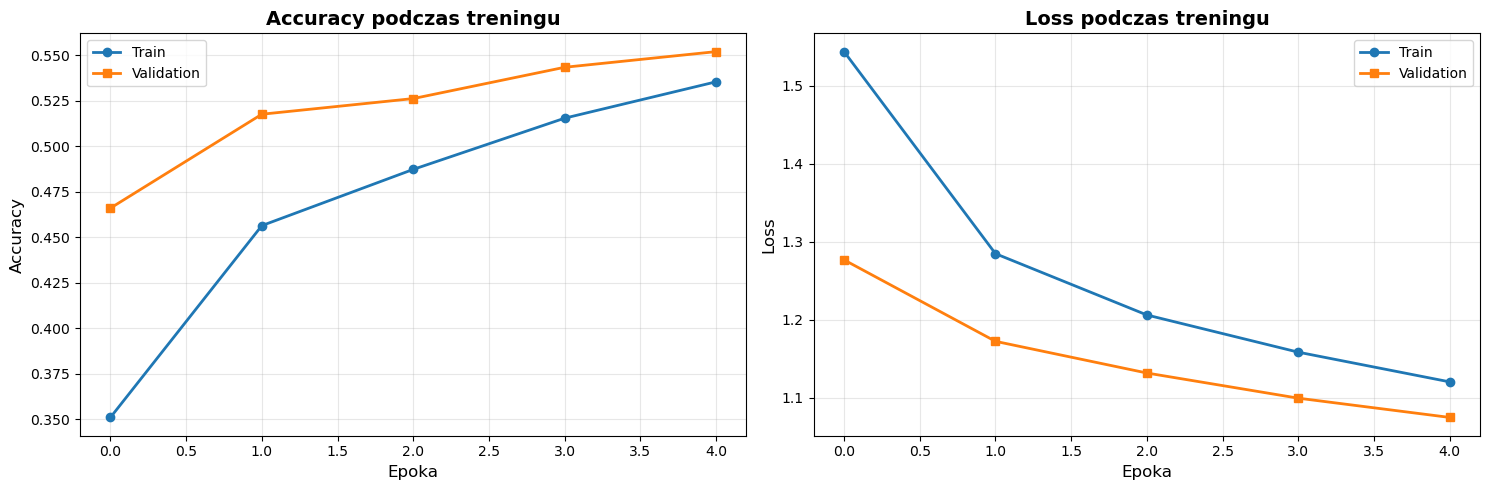

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(history.history['accuracy'], marker='o', label='Train', linewidth=2)
ax1.plot(history.history['val_accuracy'], marker='s', label='Validation', linewidth=2)
ax1.set_title('Accuracy podczas treningu', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoka', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend()
ax1.grid(alpha=0.3)

ax2.plot(history.history['loss'], marker='o', label='Train', linewidth=2)
ax2.plot(history.history['val_loss'], marker='s', label='Validation', linewidth=2)
ax2.set_title('Loss podczas treningu', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoka', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 19. Ewaluacja na zbiorze testowym

In [19]:
model_image = keras.models.load_model('saved_models/image_model_best.h5')

test_loss, test_acc = model_image.evaluate(test_ds)
print(f"\n🎯 Test Accuracy: {test_acc:.2%}")
print(f"Test Loss: {test_loss:.4f}")

95/95 ━━━━━━━━━━━━━━━━━━━━ 37s 375ms/step - accuracy: 0.5427 - loss: 1.0739
95/95 ━━━━━━━━━━━━━━━━━━━━ 37s 375ms/step - accuracy: 0.5427 - loss: 1.0739

🎯 Test Accuracy: 54.78%
Test Loss: 1.0687

🎯 Test Accuracy: 54.78%
Test Loss: 1.0687


## 20. Confusion Matrix dla obrazów

Generowanie predykcji...


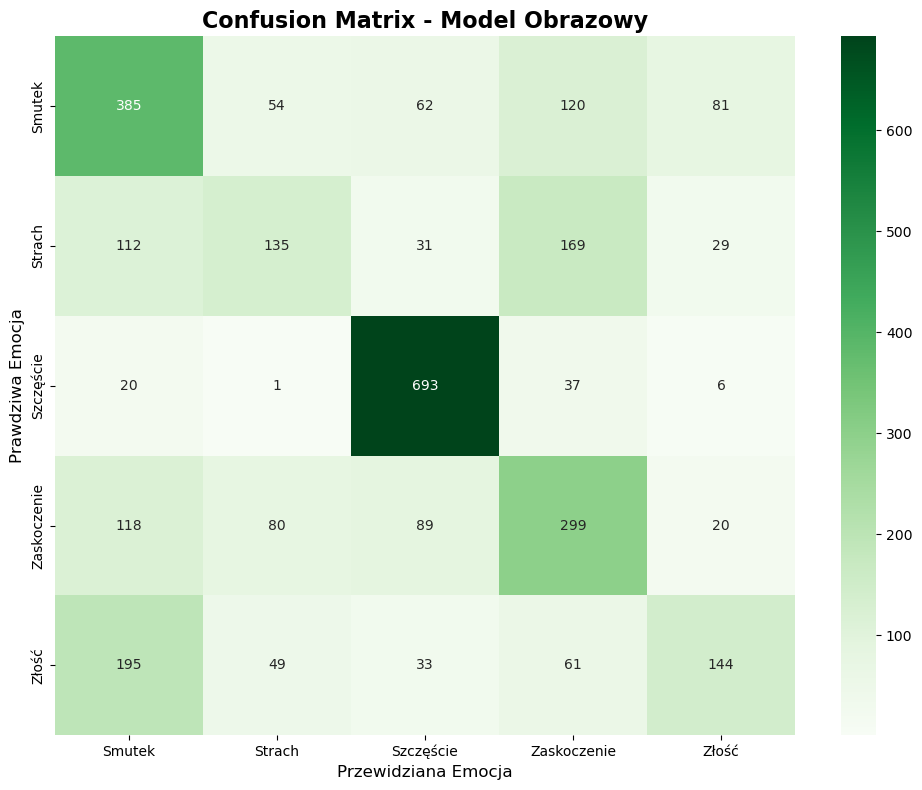


📊 Classification Report:

              precision    recall  f1-score   support

      Smutek       0.46      0.55      0.50       702
      Strach       0.42      0.28      0.34       476
   Szczęście       0.76      0.92      0.83       757
 Zaskoczenie       0.44      0.49      0.46       606
       Złość       0.51      0.30      0.38       482

    accuracy                           0.55      3023
   macro avg       0.52      0.51      0.50      3023
weighted avg       0.53      0.55      0.53      3023



In [20]:
y_pred = []
y_true = []

print("Generowanie predykcji...")
for images, labels in test_ds:
    preds = model_image.predict(images, verbose=0)
    y_pred.extend(preds.argmax(axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=emotions_list,
            yticklabels=emotions_list)
plt.title('Confusion Matrix - Model Obrazowy', fontsize=16, fontweight='bold')
plt.ylabel('Prawdziwa Emocja', fontsize=12)
plt.xlabel('Przewidziana Emocja', fontsize=12)
plt.tight_layout()
plt.show()

print("\n📊 Classification Report:\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=emotions_list
))

## 21. Zapisanie finalnego modelu

In [21]:
model_image.save('saved_models/image_model_final.h5')

import json
with open('saved_models/image_emotion_map.json', 'w') as f:
    json.dump(id_to_emotion, f)

print("✅ Model obrazowy zapisany!")
print("   - saved_models/image_model_final.h5")
print("   - saved_models/image_emotion_map.json")

✅ Model obrazowy zapisany!
   - saved_models/image_model_final.h5
   - saved_models/image_emotion_map.json
